In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PolitiFact

- Train: 381 (real: 246, fake: 135)
- Test: 102 (real: 73, fake: 29)

In [67]:
# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Macro F1 Scores
data = {
    ## MLP / Sequence Model
    # "MLP": [0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.22137404580152673, 0.43194919394235465, 0.43679163034001744, 0.22137404580152673, 0.47914057230947105, 0.43679163034001744, 0.744360902255639, 0.48941085868309586], 
    # "LSTM": [0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715], 
    ## Language Model
    # "BERT": [0.2666329113924051, 0.2666329113924051, 0.3005485893416928, 0.27631060307449745, 0.2885352195697023, 0.35222276502198335, 0.3519445514054679, 0.33229115779189056, 0.43983042682339335, 0.40144300144300143, 0.4304967269926839, 0.41085868309587986, 0.40052028133731576, 0.34893617021276596], 
    "RoBERTa": [0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715, 0.41714285714285715], 
    # "DistilBERT": [0.5603448275862069, 0.6504032258064516, 0.5827001753360608, 0.6056166056166056, 0.5887096774193548, 0.6178227848101265, 0.6040372670807453, 0.6480184042664436, 0.697515083341855, 0.5584415584415584, 0.6060881417537483, 0.6056166056166056, 0.5865546218487395, 0.61133365901319],
    "DeBERTa": [0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673, 0.22137404580152673], 
    ## Large Language Model
    "Llama": [0.7419028340080972, 0.7373627862854045, 0.7861635220125787, 0.7650088087816778, 0.7548076923076923, 0.7548076923076923, 0.7880519480519481, 0.7650088087816778, 0.7373627862854045, 0.7291404612159329, 0.7291404612159329, 0.7193175564116676, 0.7200635562617362, 0.7001763668430335], 
    "Gemma": [0.712934819317798, 0.7166666666666667, 0.7031185031185031, 0.6994949494949495, 0.6911764705882353, 0.6470588235294117, 0.6178227848101265, 0.546218487394958, 0.6565656565656566, 0.6357142857142857, 0.625, 0.6351010101010102, 0.6182952182952183, 0.6056166056166056], 
    ## Graph Model
    "LESS4FD": [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    "HeteroSGT": [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
    "KEHGNN-FD": [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
    ## Ours
    "Ours(Test-Isolated KNN)": [0.744360902255639, 0.7884075655887737, 0.7403431101272828, 0.7359000337723742, 0.8146297137664698, 0.8343121329501437, 0.8450029222676798, 0.8381940207443563, 0.8246016278803163, 0.8111111111111111, 0.8174006444683136, 0.8347222222222223, 0.8211572180011689, 0.8347222222222223],
    "Ours(KNN)": [0.744360902255639, 0.7884075655887737, 0.7403431101272828, 0.7359000337723742, 0.8146297137664698, 0.8343121329501437, 0.8450029222676798, 0.8381940207443563, 0.8246016278803163, 0.8111111111111111, 0.8174006444683136, 0.8347222222222223, 0.8211572180011689, 0.8347222222222223],
}

# for each value round to 3 decimal places
for model, record in data.items():
    data[model] = [round(value, 3) for value in record]

for model, record in data.items():
    print(f"{model}({len(record)}): {record}")

RoBERTa(14): [0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417, 0.417]
DeBERTa(14): [0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221, 0.221]
Llama(14): [0.742, 0.737, 0.786, 0.765, 0.755, 0.755, 0.788, 0.765, 0.737, 0.729, 0.729, 0.719, 0.72, 0.7]
Gemma(14): [0.713, 0.717, 0.703, 0.699, 0.691, 0.647, 0.618, 0.546, 0.657, 0.636, 0.625, 0.635, 0.618, 0.606]
LESS4FD(14): [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
HeteroSGT(14): [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
KEHGNN-FD(14): [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
Ours(Test-Isolated KNN)(14): [0.744, 0.788, 0.74, 0.736, 0.815, 0.834, 0.845, 0.838, 0.825, 0.811, 0.817, 0.835, 0.821, 0.835]
Ours(KNN)(14): [0.744, 0.788, 0.74, 0.736, 0.815, 0.834, 0.845, 0.838, 0.825, 0.811, 0.817, 0.835, 0.821, 0.835]


In [68]:
# show all the matplot mark and line style
import matplotlib.pyplot as plt

# get all the marker
print("All available matplotlib markers:")
print(plt.Line2D.markers)
print("\nAll available matplotlib line styles:")
print(plt.Line2D.lineStyles)


All available matplotlib markers:
{'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', 'none': 'nothing', ' ': 'nothing', '': 'nothing'}

All available matplotlib line styles:
{'-': '_draw_solid', '--': '_draw_dashed', '-.': '_draw_dash_dot', ':': '_draw_dotted', 'None': '_draw_nothing', ' ': '_draw_nothing', '': '_draw_nothing'}


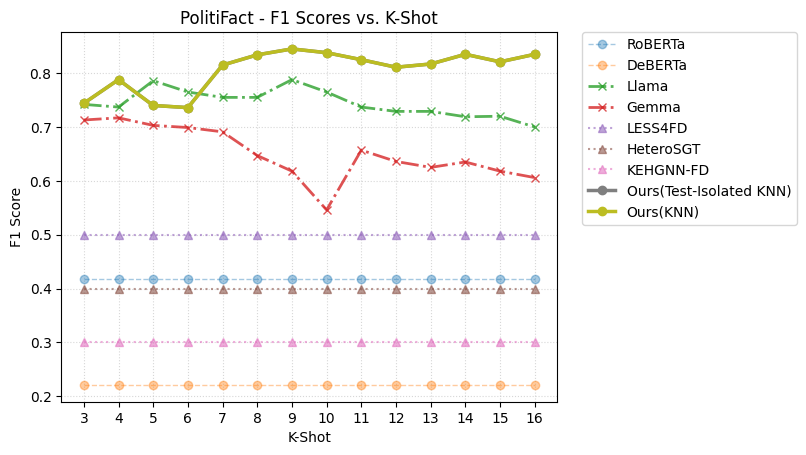

In [69]:
ours = ["Ours(KNN)", "Ours(Test-Isolated KNN)"]
graphs = ["LESS4FD", "HeteroSGT", "KEHGNN-FD"]
llm = ["Llama", "Gemma"]
sequence = ["MLP", "LSTM", "BERT", "RoBERTa", "DistilBERT", "DeBERTa"]
colors = plt.get_cmap("tab10").colors
fig, ax = plt.subplots()

for idx, (series_name, f1_sequence) in enumerate(data.items()):
    if series_name in ours:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=2.5, color=colors[idx % 10], alpha=1.0, linestyle="-")
    elif series_name in llm:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="x", linewidth=2, color=colors[idx % 10], alpha=0.8, linestyle="-.")
    elif series_name in graphs:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="^", linewidth=1.5, color=colors[idx % 10], alpha=0.6, linestyle=":")
    else:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=1, color=colors[idx % 10], alpha=0.4, linestyle="--")

ax.set_xlabel("K-Shot")
ax.set_ylabel("F1 Score")
ax.set_title("PolitiFact - F1 Scores vs. K-Shot")
ax.set_xticks(range(3, 17))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()

# GossipCop

- Train: 9988 (real: 7955, fake: 2033)
- Test: 2672 (real: 2169, 503)

In [70]:
# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Macro F1 Scores
data = {
    ## MLP / Sequence Model
    # "MLP": [0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.20837101031505678, 0.1584251968503937, 0.3937524550494808, 0.369476727036753, 0.1584251968503937, 0.3251654758067668, 0.3204456097119074, 0.48722756393881494, 0.1584251968503937],
    # "LSTM": [0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482],
    # Language Model
    # "BERT": [0.21721449553106068, 0.39095803723350664, 0.33981998941114183, 0.5059865664431236, 0.545900974025974, 0.4489783828250431, 0.5167989644604344, 0.4956483351452377, 0.5106455603931384, 0.5041370593770967, 0.4994288849956804, 0.5404571169947952, 0.4918823837029642, 0.4610573474895161],
    "RoBERTa": [0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482, 0.4480479239826482],
    # "DistilBERT": [0.539681524685335, 0.5016768447060135, 0.5753744909281324, 0.5983801415302963, 0.5427770950216155, 0.5450436581776739, 0.5076999025886729, 0.4879693708228229, 0.5080864635697339, 0.4925643146505907, 0.5469893682860267, 0.5088828555374089, 0.49219733726279685, 0.595438459343999],
    "DeBERTa": [0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937, 0.1584251968503937],
    ## Large Language Model
    "Llama": [0.6679255164712748, 0.6457010103666688, 0.6177880459599309, 0.6577314598213395, 0.6292252082406891, 0.6495745254394713, 0.6520353204830424, 0.6629755533652726, 0.6513694713826091, 0.6502522676893367, 0.651766327136569, 0.6491066846449868, 0.6494006684110187, 0.6503160436862094],
    "Gemma": [0.5962110645690657, 0.5925529139365211, 0.5143715545038983, 0.5418738540690963, 0.5614267062927683, 0.5795503126600933, 0.47562651960638513, 0.5061918317662056, 0.5910820424656917, 0.5431205987907018, 0.46079071370083313, 0.5645353746215376, 0.4310082715635607, 0.3847396204678999],
    ## Graph Model
    "LESS4FD": [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    "HeteroSGT": [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
    "KEHGNN-FD": [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
    ## Ours
    "Ours(KNN)": [0.6255795355984044, 0.6198110185666093, 0.6016873258252569, 0.5886307219017464, 0.605831804663597, 0.5928805576265369, 0.5959055253125898, 0.6089156893530694, 0.6114997645029868, 0.5959055253125898, 0.5956047167620404, 0.5982061120419853, 0.5930514534323731, 0.5956047167620404],
    "Ours(Test-Isolated KNN)": [0.6255795355984044, 0.6198110185666093, 0.6016873258252569, 0.5886307219017464, 0.605831804663597, 0.5928805576265369, 0.5959055253125898, 0.6089156893530694, 0.6114997645029868, 0.5959055253125898, 0.5956047167620404, 0.5982061120419853, 0.5930514534323731, 0.5956047167620404],
}

# for each value round to 2 decimal places
for model, record in data.items():
    data[model] = [round(value, 3) for value in record]

for model, record in data.items():
    print(f"{model}({len(record)}): {record}")

RoBERTa(14): [0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448, 0.448]
DeBERTa(14): [0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158, 0.158]
Llama(14): [0.668, 0.646, 0.618, 0.658, 0.629, 0.65, 0.652, 0.663, 0.651, 0.65, 0.652, 0.649, 0.649, 0.65]
Gemma(14): [0.596, 0.593, 0.514, 0.542, 0.561, 0.58, 0.476, 0.506, 0.591, 0.543, 0.461, 0.565, 0.431, 0.385]
LESS4FD(14): [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
HeteroSGT(14): [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
KEHGNN-FD(14): [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
Ours(KNN)(14): [0.626, 0.62, 0.602, 0.589, 0.606, 0.593, 0.596, 0.609, 0.611, 0.596, 0.596, 0.598, 0.593, 0.596]
Ours(Test-Isolated KNN)(14): [0.626, 0.62, 0.602, 0.589, 0.606, 0.593, 0.596, 0.609, 0.611, 0.596, 0.596, 0.598, 0.593, 0.596]


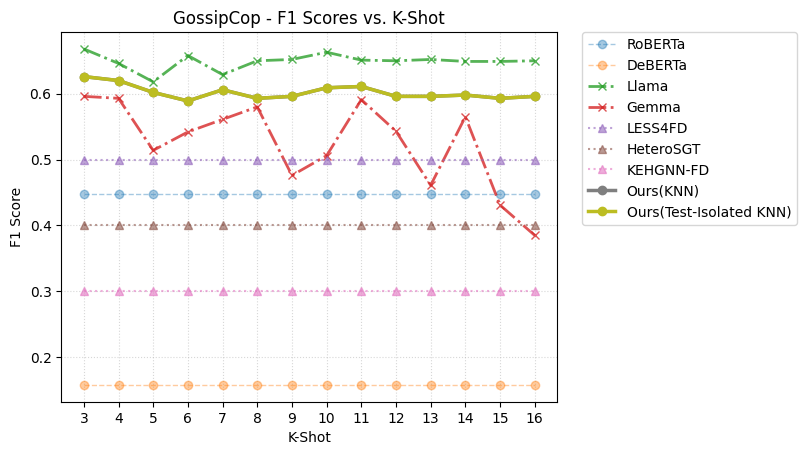

In [71]:
ours = ["Ours(KNN)", "Ours(Test-Isolated KNN)"]
graphs = ["LESS4FD", "HeteroSGT", "KEHGNN-FD"]
llm = ["Llama", "Gemma"]
sequence = ["MLP", "LSTM", "BERT", "RoBERTa", "DistilBERT", "DeBERTa"]
colors = plt.get_cmap("tab10").colors
fig, ax = plt.subplots()

for idx, (series_name, f1_sequence) in enumerate(data.items()):
    if series_name in ours:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=2.5, color=colors[idx % 10], alpha=1.0, linestyle="-")
    elif series_name in llm:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="x", linewidth=2, color=colors[idx % 10], alpha=0.8, linestyle="-.")
    elif series_name in graphs:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="^", linewidth=1.5, color=colors[idx % 10], alpha=0.6, linestyle=":")
    else:
        ax.plot(k_shots, f1_sequence, label=series_name, marker="o", linewidth=1, color=colors[idx % 10], alpha=0.4, linestyle="--")

ax.set_xlabel("K-Shot")
ax.set_ylabel("F1 Score")
ax.set_title("GossipCop - F1 Scores vs. K-Shot")
ax.set_xticks(range(3, 17))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle=":", alpha=0.5)
plt.show()